<a href="https://colab.research.google.com/github/Rogerio-mack/CIMATEC-Tecnicas-de-Construcao-de-Algoritmos-Quanticos-UA3-UA4/blob/main/QPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIMATEC - Técnicas de Construção de Algoritmos Quânticos
---
### UA 3 e UA 4 - Hands On (Parte B, QPE)

### **GRUPO 7**

- Bruno Zolotareff dos Santos;
- Lihoy Aguiar Bellissimo;
- Marcos Aurélio Duarte Carvalho;
- Rafael Marin Machado de Souza;  
- Rogério de Oliveira;
- Thiago Soares Assimos;


# Conteúdo

Este notebook implementa um QPE mínimo (3 qubits) como parte da tarefa UA 3 e UA 4 - Hands On (Parte B, QPE).

# Installs

In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-aer

In [ ]:
!pip install pylatexenc
!pip install -q qiskit[visualization]

# QPE Mínimo (3 qubits)

{'011': 1024}


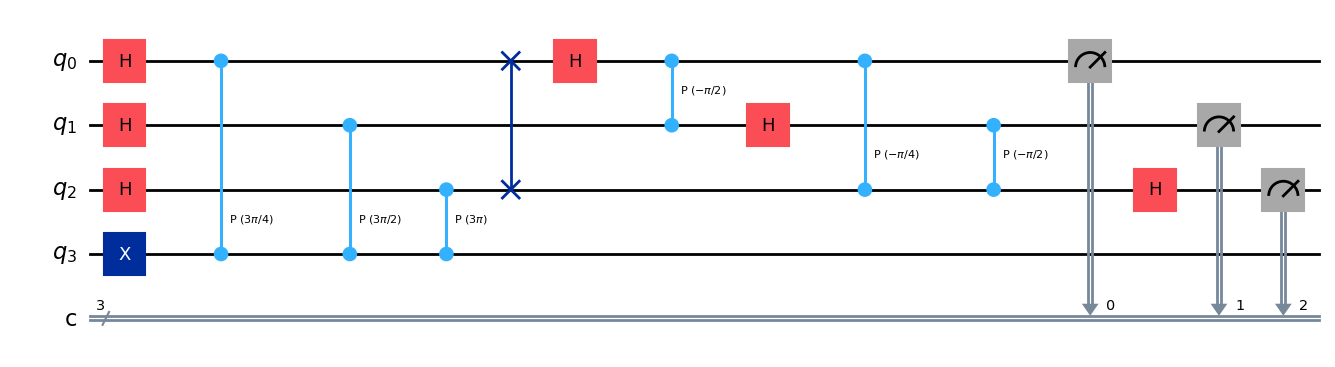

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.circuit.library import PhaseGate
from qiskit.visualization import plot_bloch_multivector, plot_histogram, circuit_drawer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# fase alvo
phi = 0.375  # = 3/8 = 0.011 em binário
theta = 2*np.pi*phi

n_count = 3  # qubits de leitura

qc = QuantumCircuit(n_count + 1, n_count)

# Preparar autovetor |1>
qc.x(n_count)

# Superposição no registrador de leitura
for q in range(n_count):
    qc.h(q)

# Operador U
U = PhaseGate(theta)

# Aplica U^(2^k) controlado
for k in range(n_count):
    U_power = PhaseGate(theta * (2**k))
    qc.append(U_power.control(), [k, n_count])

# Aplica QFT inversa
def inverse_qft(circ, n):
    for j in range(n//2):
        circ.swap(j, n-1-j)
    for j in range(n):
        for m in range(j):
            circ.cp(-np.pi/(2**(j-m)), m, j)
        circ.h(j)

inverse_qft(qc, n_count)

# Medida
qc.measure(range(n_count), range(n_count))

# Simulação
backend = Aer.get_backend("aer_simulator")
tqc = transpile(qc, backend)
result = backend.run(tqc, shots=1024).result()
counts = result.get_counts()

print(counts)
display(qc.draw('mpl'))
